# Bioimage Analysis Workflow for BBBC007v1 Dataset

This notebook provides a comprehensive workflow for segmenting biological images, extracting features, and analyzing these features to understand their relationships. The dataset used is cited as follows: "We used image set BBBC007v1 image set version 1 (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012]."

## Steps to be followed

1. Setup the software environment.
2. Import necessary libraries.
3. Load and preprocess the images and corresponding labels.
4. Implement an image segmentation algorithm.
5. Evaluate the segmentation quality using the Sparse Jaccard index.
6. Extract features from the segmented images.
7. Visualize relationships between extracted features.
8. Identify strongly correlated features.
9. Save segmentation results and extracted features for further use.
10. Provide installation instructions, user guide, and documentation of used data and algorithms.

## Installation Instructions

1. Install Python (version >= 3.6).
2. Install required libraries:
```
pip install numpy pandas scikit-image matplotlib stackview seaborn the_segmentation_game
```


In [1]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
from skimage import io, filters, measure, morphology, segmentation
import matplotlib.pyplot as plt
import stackview
from the_segmentation_game import metrics
import seaborn as sns


### Load and preprocess images

We will load images and their corresponding label images from the specified directories.

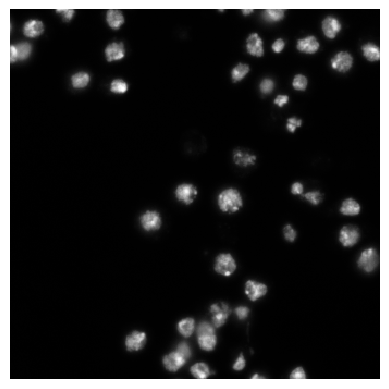

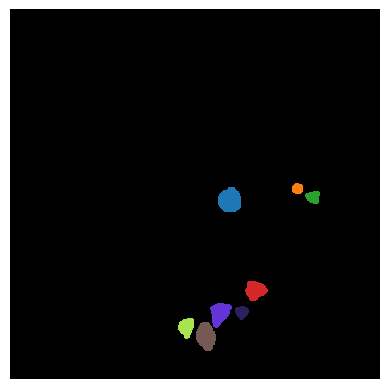

In [2]:
# Load and preprocess images
image_folder = '../05b_quality_assurance/data/BBBC007_batch/'
label_folder = '../05b_quality_assurance/data/BBBC007_sparse_instance_annotation/'

image_files = sorted([file for file in os.listdir(image_folder) if file.endswith('.tif')])
label_files = sorted([file for file in os.listdir(label_folder) if file.endswith('.tif')])

images = [io.imread(os.path.join(image_folder, file)) for file in image_files]
labels = [io.imread(os.path.join(label_folder, file)) for file in label_files]

# Display an example image and its corresponding label
stackview.imshow(images[0])
stackview.imshow(labels[0])

### Implement an image segmentation algorithm

We will use Otsu's thresholding for segmentation. Otsu's algorithm finds an optimal threshold to distinguish foreground from background.

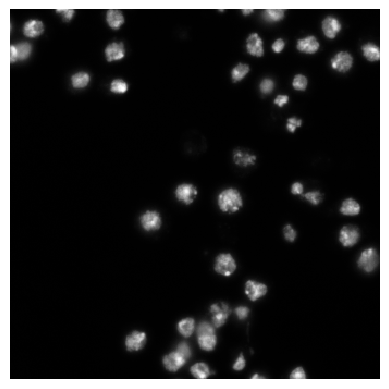

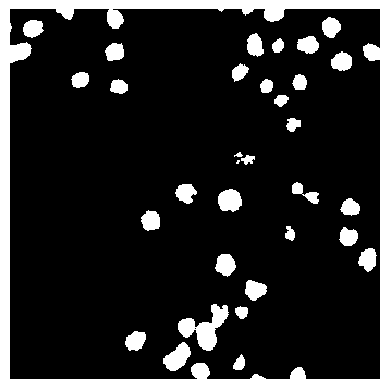

In [3]:
# Segment images using Otsu's thresholding
segmented_images = []

for image in images:
    threshold_value = filters.threshold_otsu(image)
    segmented_image = image > threshold_value
    segmented_images.append(segmented_image)

# Display the original and segmented image
stackview.imshow(images[0])
stackview.imshow(segmented_images[0])

### Evaluate segmentation quality using Sparse Jaccard Index

The Sparse Jaccard Index measures the similarity between the segmented image and the reference label.

In [4]:
# Evaluate segmentation quality
jaccard_indices = []

for label, seg_image in zip(labels, segmented_images):
    jaccard_index = metrics.jaccard_index_sparse(label, seg_image)
    jaccard_indices.append(jaccard_index)

# Display Jaccard indices
print(jaccard_indices)

[0.025222414713303096, 0.027578040952076943, 0.008475035354778674, 0.015014896681473008, 0.011168969355439111, 0.012615143249351316]


### Extract features from the segmented images

We will extract properties such as area, mean intensity, and eccentricity from labeled regions.

In [5]:
# Extract features
features_list = []

for seg_image in segmented_images:
    labeled_image = measure.label(seg_image)
    properties = measure.regionprops_table(labeled_image, properties=['label', 'area', 'eccentricity'])
    properties_df = pd.DataFrame(properties)
    properties_df['mean_intensity'] = [region.mean_intensity for region in measure.regionprops(labeled_image, intensity_image=image)]
    features_list.append(properties_df)

# Concatenate all features into a single DataFrame
features_df = pd.concat(features_list, ignore_index=True)

# Display the features DataFrame
display(features_df.head())

,label,area,eccentricity,mean_intensity
0,1,114.0,0.845116,54.122807
1,2,218.0,0.584506,68.642202
2,3,11.0,0.890818,21.363636
3,4,45.0,0.860287,20.888889
4,5,194.0,0.799463,32.974227


### Visualize relationships between extracted features

We will create scatter plots and correlation matrices to visualize relationships.

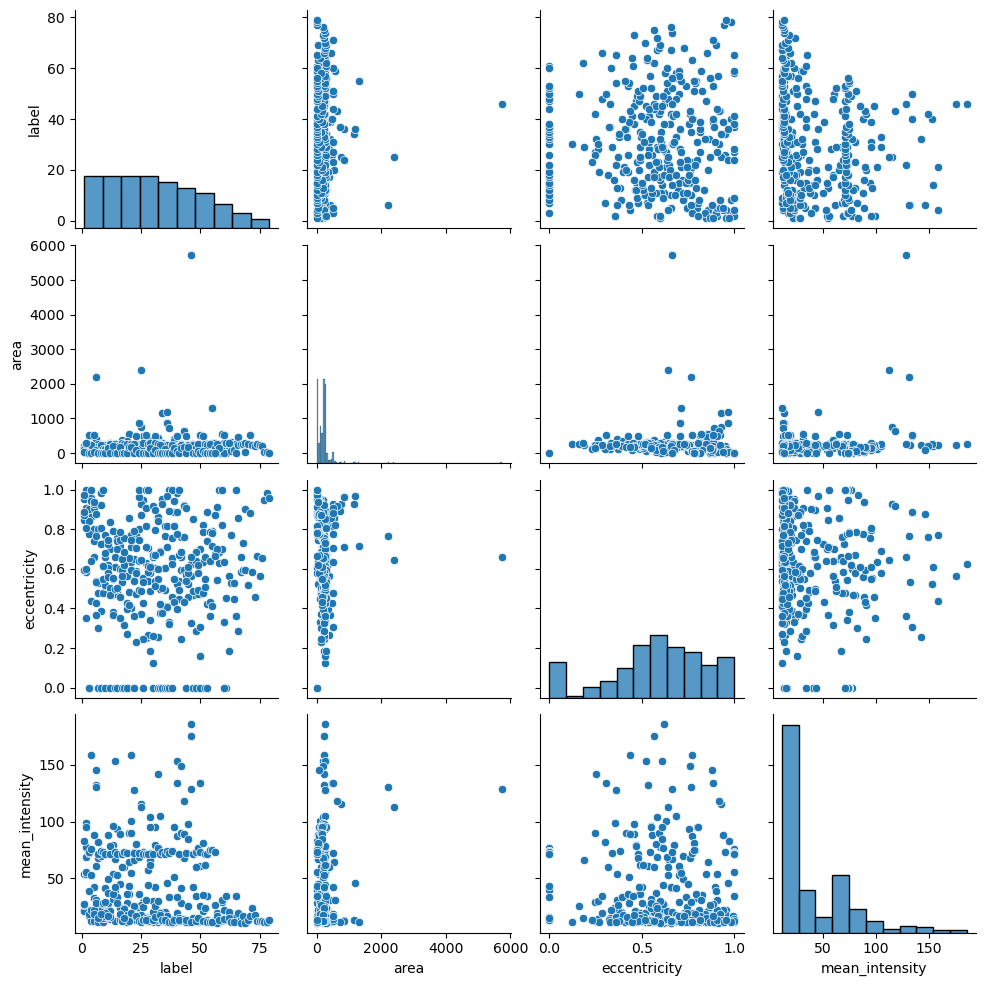

In [6]:
# Visualize relationships between features
sns.pairplot(features_df)
plt.show()

### Identify strongly correlated features

We will compute correlation coefficients and identify pairs of features with strong correlations.

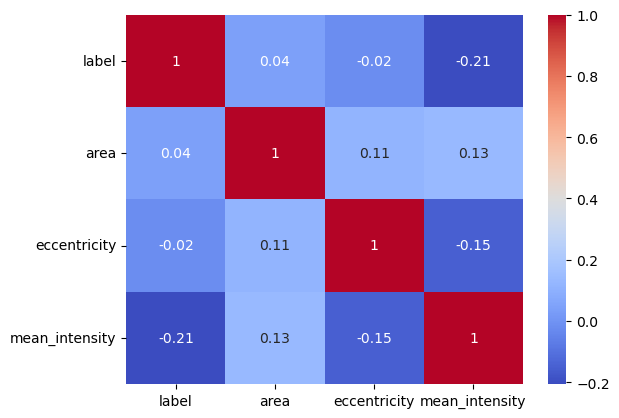

In [7]:
# Identify strongly correlated features
correlation_matrix = features_df.corr()

# Display correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Save results

Save the segmented images and extracted features for further analysis.

In [8]:
# Save segmented images and extracted features
output_seg_folder = 'segmented_images/'
os.makedirs(output_seg_folder, exist_ok=True)

for i, seg_image in enumerate(segmented_images):
    io.imsave(os.path.join(output_seg_folder, f'seg_image_{i}.tif'), seg_image.astype(np.uint8)*255)

features_df.to_csv('extracted_features.csv', index=False)

### Documentation

Provide installation instructions, user guide, and documentation of used data and algorithms.

## User Guide

1. Place the image files in the `../05b_quality_assurance/data/BBBC007_batch/` directory.
2. Place the corresponding label files in the `../05b_quality_assurance/data/BBBC007_sparse_instance_annotation/` directory.
3. Run this notebook to process the images and extract features.
4. Results will be saved in the `segmented_images/` directory and the `extracted_features.csv` file.

## Documentation of Used Data

"We used image set BBBC007v1 image set version 1 (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012]."

## Explanation of Used Algorithms

* **Otsu's Thresholding:** Otsu's method is used to automatically perform clustering-based image thresholding. It finds the threshold that minimizes the within-class variance.
* **Sparse Jaccard Index:** A measure that compares the similarity and diversity of sample sets, specifically looking at the intersection over the union of the sets.
* **Region Properties Extraction:** Using `measure.regionprops_table` from `skimage.measure` to extract various properties like area, mean intensity, and eccentricity from labeled regions in the image.